In [1]:
#######################################################################
#Sep 17th, 2025 (Wednesday)
#######################################################################

In [2]:
import pandas as pd
pd.set_option("display.float_format","{:.4f}".format)

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
df = fetch_california_housing(as_frame=True)

In [5]:
data = df.data

In [6]:
df_all = df.frame

In [7]:
df_all.isna().sum().sum()

0

In [8]:
df_all.duplicated().sum().sum()

0

In [9]:
df

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252   41.0000    6.9841     1.0238    322.0000    2.5556   37.8800   
 1      8.3014   21.0000    6.2381     0.9719   2401.0000    2.1098   37.8600   
 2      7.2574   52.0000    8.2881     1.0734    496.0000    2.8023   37.8500   
 3      5.6431   52.0000    5.8174     1.0731    558.0000    2.5479   37.8500   
 4      3.8462   52.0000    6.2819     1.0811    565.0000    2.1815   37.8500   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603   25.0000    5.0455     1.1333    845.0000    2.5606   39.4800   
 20636  2.5568   18.0000    6.1140     1.3158    356.0000    3.1228   39.4900   
 20637  1.7000   17.0000    5.2055     1.1201   1007.0000    2.3256   39.4300   
 20638  1.8672   18.0000    5.3295     1.1719    741.0000    2.1232   39.4300   
 20639  2.3886   16.0000    5.2547     1.1623   1387.0000    2.6170   39.3700   
 
        Longitude 

In [10]:
X = df.data
y = df.target

In [11]:
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500


In [12]:
df.target_names

['MedHouseVal']

In [13]:
features = df.feature_names

In [14]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
data.shape

(20640, 8)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42
)

In [18]:
20640*0.2

4128.0

In [19]:
X_test.shape

(4128, 8)

In [20]:
20640*0.8

16512.0

In [21]:
X_train.shape

(16512, 8)

In [22]:
import matplotlib.pyplot as plt

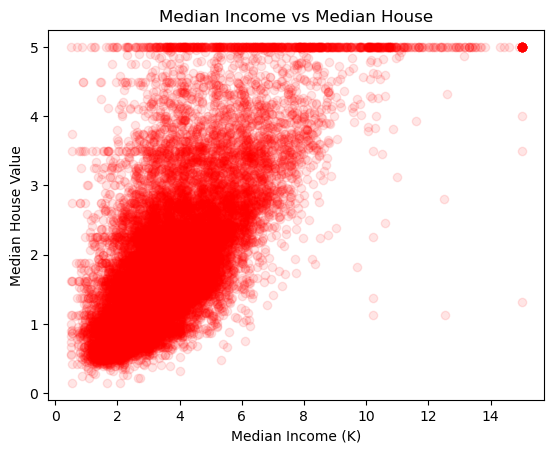

In [23]:
plt.scatter(X_train["MedInc"],y_train, color="red", alpha = 0.1)
plt.xlabel("Median Income (K)")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House")
plt.show()

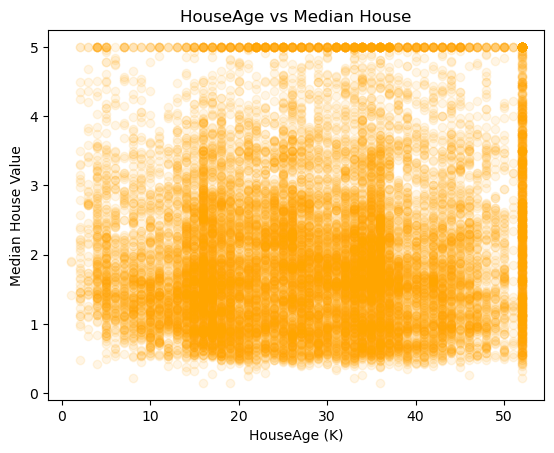

In [24]:
plt.scatter(X_train["HouseAge"],y_train, color="orange", alpha = 0.1)
plt.xlabel("HouseAge (K)")
plt.ylabel("Median House Value")
plt.title("HouseAge vs Median House")
plt.show()

In [25]:
features = df.feature_names
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


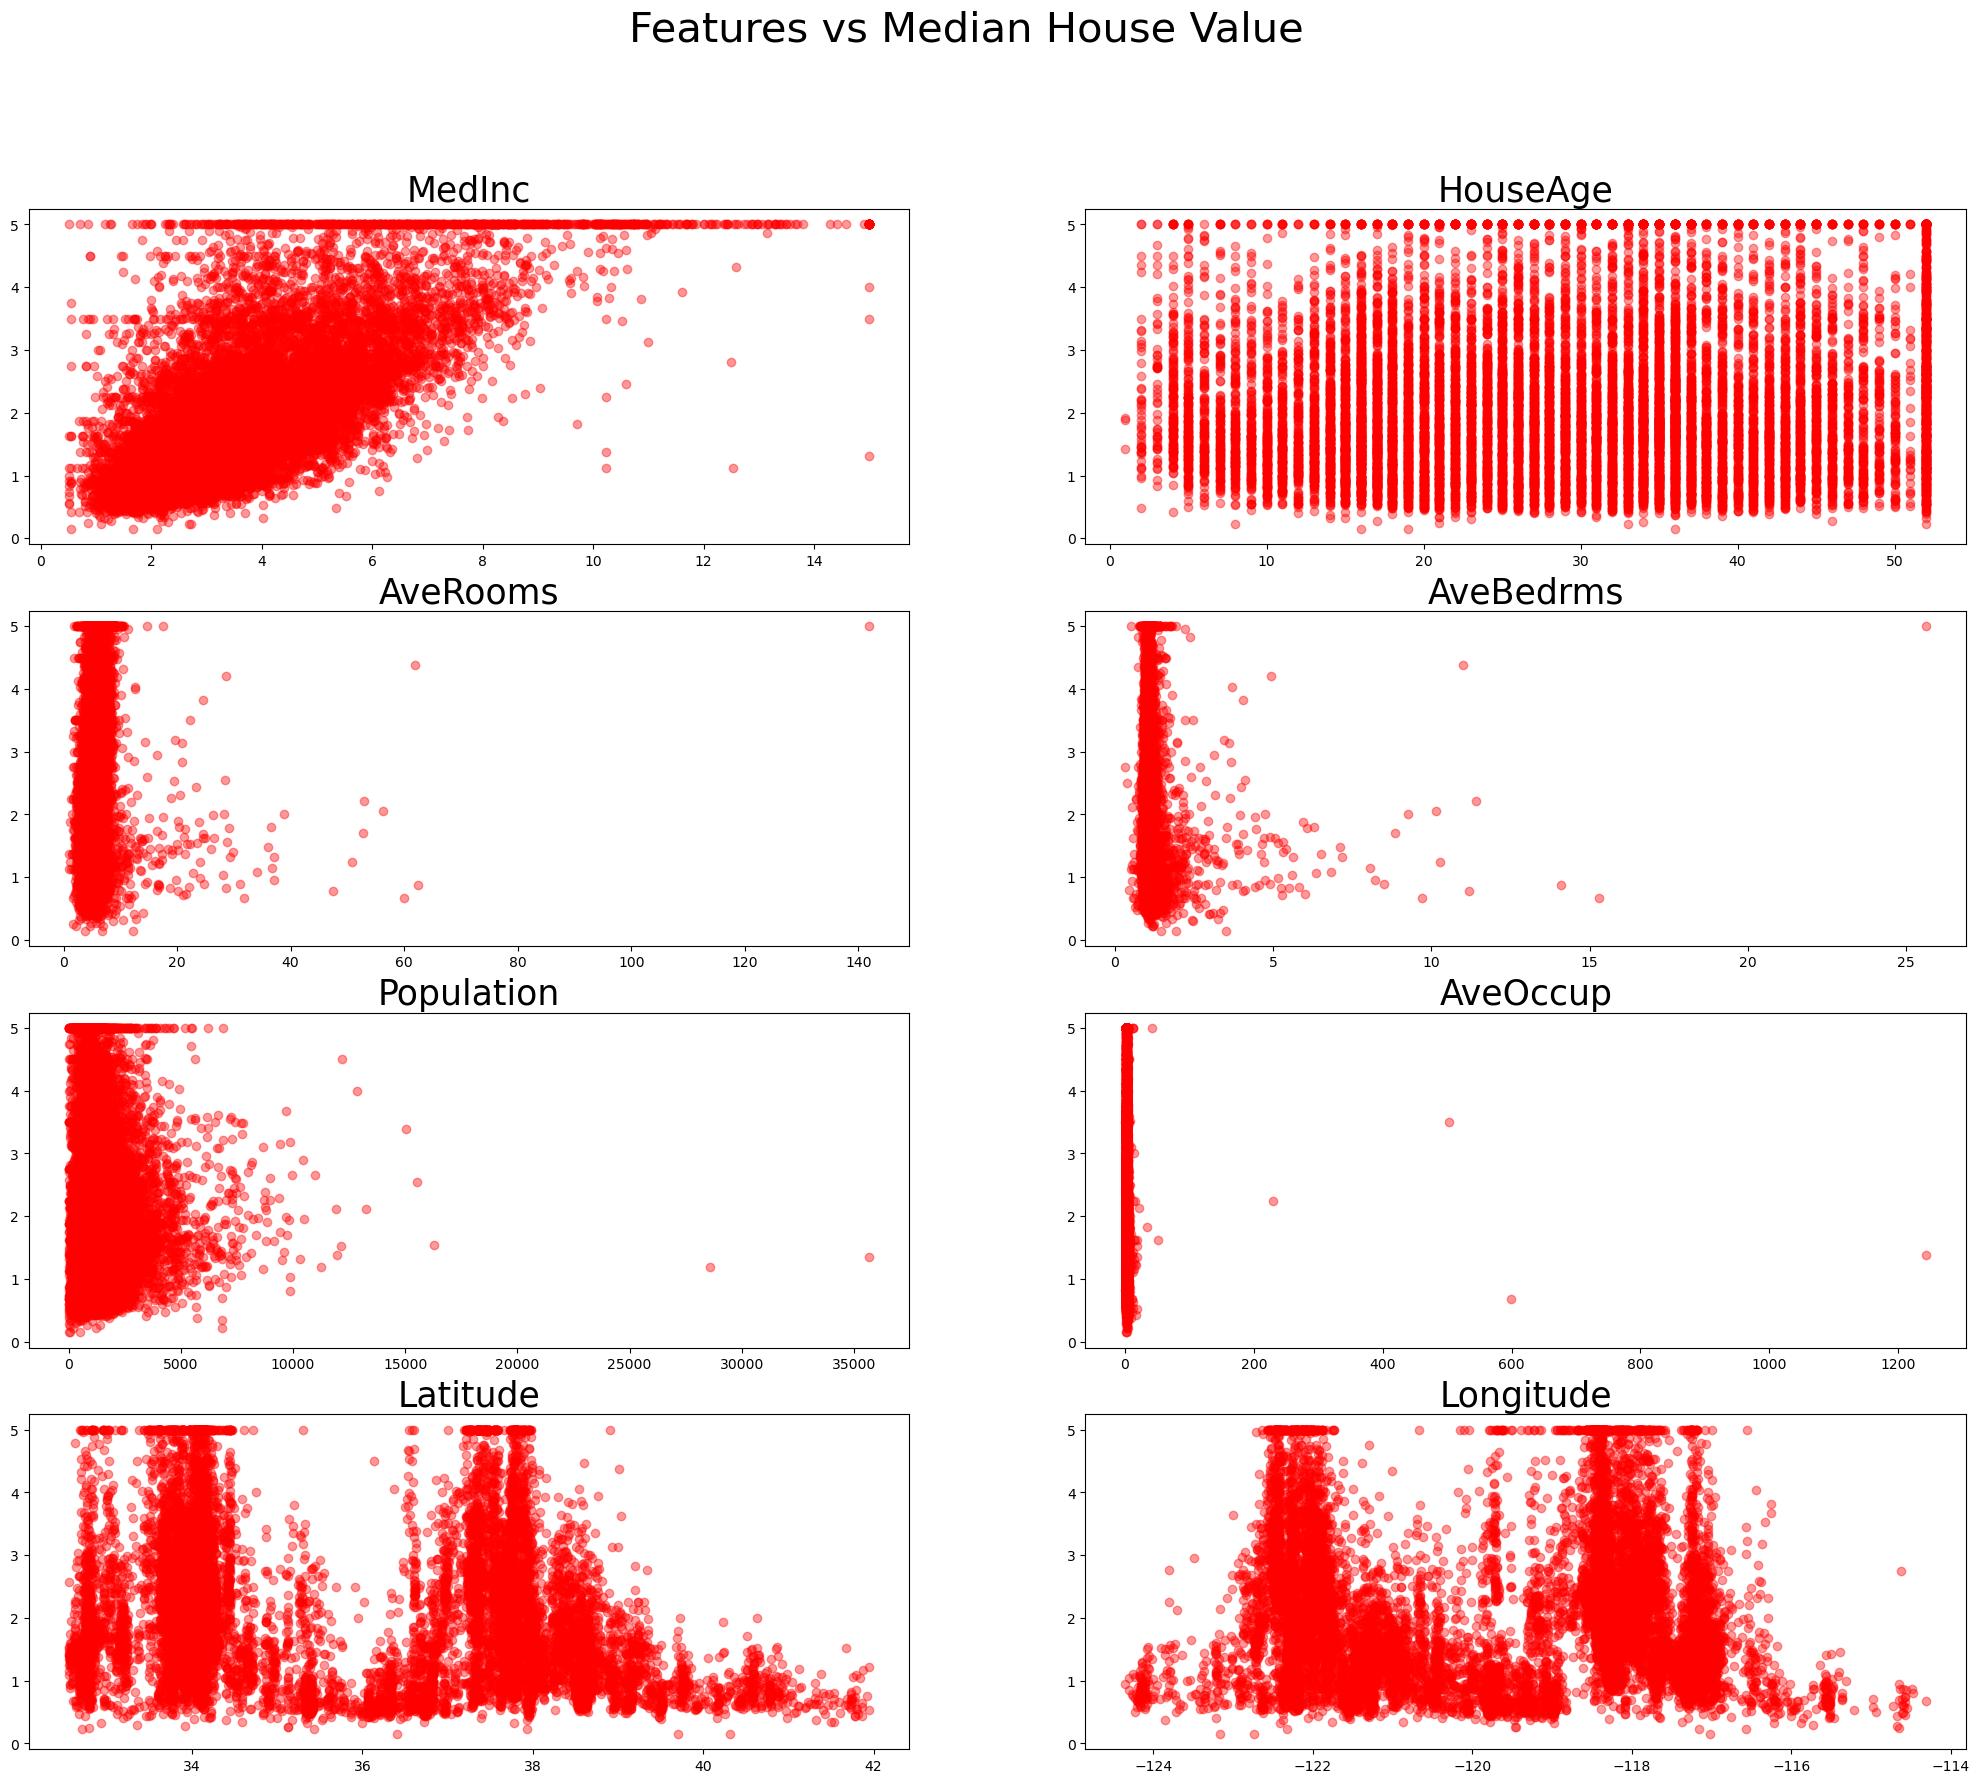

In [26]:
plt.figure(figsize=(25,20))
for i, feature in enumerate(features,1):
        plt.subplot(4,2,i)
        plt.scatter(X_train[feature],y_train, color="red", alpha=0.4)
        plt.title(feature,fontsize=25)
plt.suptitle("Features vs Median House Value",fontsize=30)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled_frame = pd.DataFrame(X_train_scaled,columns=features)

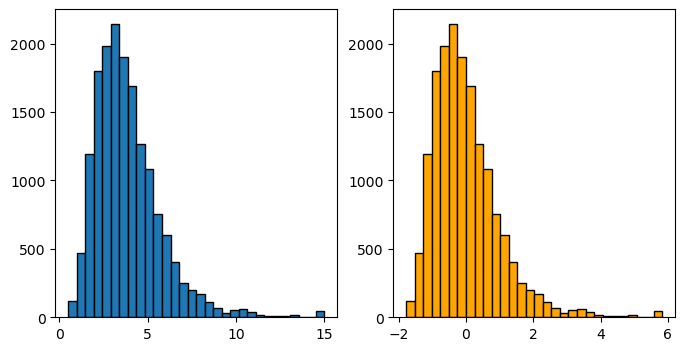

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(X_train["MedInc"],bins=30,edgecolor="black")

plt.subplot(1,2,2)
plt.hist(X_train_scaled_frame["MedInc"],bins=30,color="orange", edgecolor="black")

plt.show()

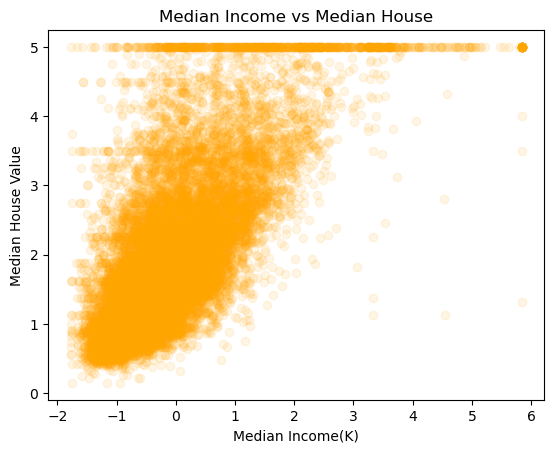

In [31]:
plt.scatter(X_train_scaled_frame["MedInc"],y_train, color="orange", alpha = 0.1)
plt.xlabel("Median Income(K)")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House")
plt.show()

In [32]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,16512.0000,3.8808,1.9043,0.4999,2.5667,3.5458,4.7732,15.0001
HouseAge,16512.0000,28.6083,12.6025,1.0000,18.0000,29.0000,37.0000,52.0000
AveRooms,16512.0000,5.4352,2.3874,0.8889,4.4521,5.2359,6.0610,141.9091
AveBedrms,16512.0000,1.0967,0.4332,0.3333,1.0065,1.0493,1.1003,25.6364
Population,16512.0000,1426.4530,1137.0564,3.0000,789.0000,1167.0000,1726.0000,35682.0000
AveOccup,16512.0000,3.0970,11.5787,0.6923,2.4288,2.8172,3.2800,1243.3333
Latitude,16512.0000,35.6431,2.1367,32.5500,33.9300,34.2600,37.7200,41.9500
Longitude,16512.0000,-119.5823,2.0057,-124.3500,-121.8100,-118.5100,-118.0100,-114.3100


In [33]:
X_train_scaled_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,16512.0000,-0.0000,1.0000,-1.7754,-0.6901,-0.1759,0.4687,5.8393
HouseAge,16512.0000,-0.0000,1.0000,-2.1908,-0.8418,0.0311,0.6659,1.8562
AveRooms,16512.0000,-0.0000,1.0000,-1.9044,-0.4118,-0.0835,0.2621,57.1666
AveBedrms,16512.0000,-0.0000,1.0000,-1.7621,-0.2082,-0.1094,0.0085,56.6473
Population,16512.0000,-0.0000,1.0000,-1.2519,-0.5606,-0.2282,0.2634,30.1274
AveOccup,16512.0000,0.0000,1.0000,-0.2077,-0.0577,-0.0242,0.0158,107.1164
Latitude,16512.0000,0.0000,1.0000,-1.4477,-0.8018,-0.6474,0.9720,2.9518
Longitude,16512.0000,0.0000,1.0000,-2.3772,-1.1107,0.5347,0.7840,2.6288


In [34]:
#######################################################################
#Sep 19th, 2025 (Friday)
#######################################################################

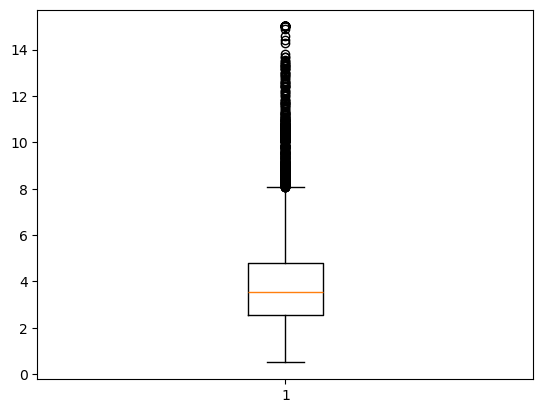

In [35]:
plt.boxplot(X_train["MedInc"])
plt.show()

In [ ]:
plt.boxplot(X_train["MedInc"])
plt.show()

<Axes: >

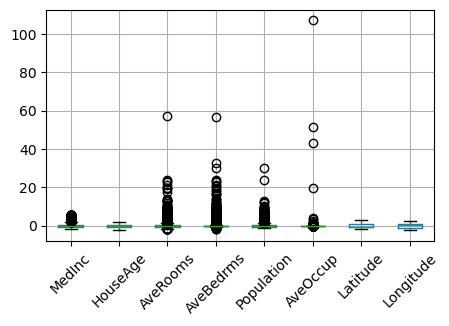

In [41]:
plt.figure(figsize=(5,3))
X_train_scaled_frame.boxplot(rot=45)

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
ols = LinearRegression()

In [45]:
ols.fit(X_train,y_train) #only on training, learning parameters

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_test_pred = ols.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [55]:
sse = np.sum((y_test - y_test_pred)**2)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

In [54]:
print("SSE:", sse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

SSE: 2294.7205194139688
MSE: 0.5558915986952444
RMSE: 0.7455813830127764
R2: 0.5757877060324508
